In [1]:
import glob
import pandas as pd
import anndata
import pathlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm as cm
import seaborn as sns
from amb import *

In [2]:
from amb import *
age_dict = get_age_palette()
age_dict['8wk'] = age_dict['2mo']

In [3]:
_dir = '/home/qzeng_salk_edu/project/240205-domain/hicluster_bulk_domain'

In [4]:
all_sum = []

for path in glob.glob(f"{_dir}/*.boundary.h5ad"):
    adata = anndata.read_h5ad(path)
    bulk_doundary = pd.DataFrame(adata.X.toarray(), index= adata.obs_names, columns = adata.var_names)
    #bulk_doundary != 0
    _sum = bulk_doundary.sum(axis = 1)
    _sum = pd.DataFrame(_sum).T
    _sum.columns = [name.split('.')[-1] for name in _sum.columns]
    _sum['celltype'] = pathlib.Path(path).name.split('.')[0]
    all_sum.append(_sum)
    break

In [5]:
col_order = ['8wk','9mo','18mo', 'celltype']
all_sum = pd.concat(all_sum)
all_sum = all_sum[col_order]
all_sum.head()

,8wk,9mo,18mo,celltype
0,8736,8694,8952,Oligo_NN
0,7860,7800,7696,PAG-PPN_Pax5_Sox21_Gaba
0,8268,8334,8602,L23_IT_CTX_Glut
0,8586,8502,8712,L23_IT_ENT_Glut
0,8594,8922,9154,DG-PIR_Ex_IMN


In [6]:
df_long = pd.melt(all_sum, id_vars=['celltype'], var_name='age', value_name='domain_number')

In [7]:
df_long['domain_number'] = df_long['domain_number']//2

In [8]:
hue_order = ['8wk','9mo','18mo']

In [18]:
order = ['Oligo_NN','Microglia_NN', 'OPC_NN', 'Astro-TE_NN', 'VLMC_NN',
         'Vip_Gaba', 'Pvalb_Gaba', 'Lamp5_Gaba','Sst_Gaba',
         'CEA-BST_Gaba','STR-PAL_Chst9_Gaba', 'MEA-BST_Gaba',
        'L23_IT_CTX_Glut', 'L23_IT_PPP_Glut','L23_IT_ENT_Glut','L6_IT_CTX_Glut','L6_CT_CTX_Glut', 'L6bCT_ENT_Glut',
        'CA1-ProS_Glut', 'CA3_Glut', 'DG_Glut', 
        'LA-BLA-BMA-PA_Glut',  'SUB-ProS_Glut', 'MEA-COA_Glut', ]

In [21]:
df_long = df_long[df_long['celltype'].isin(order)]

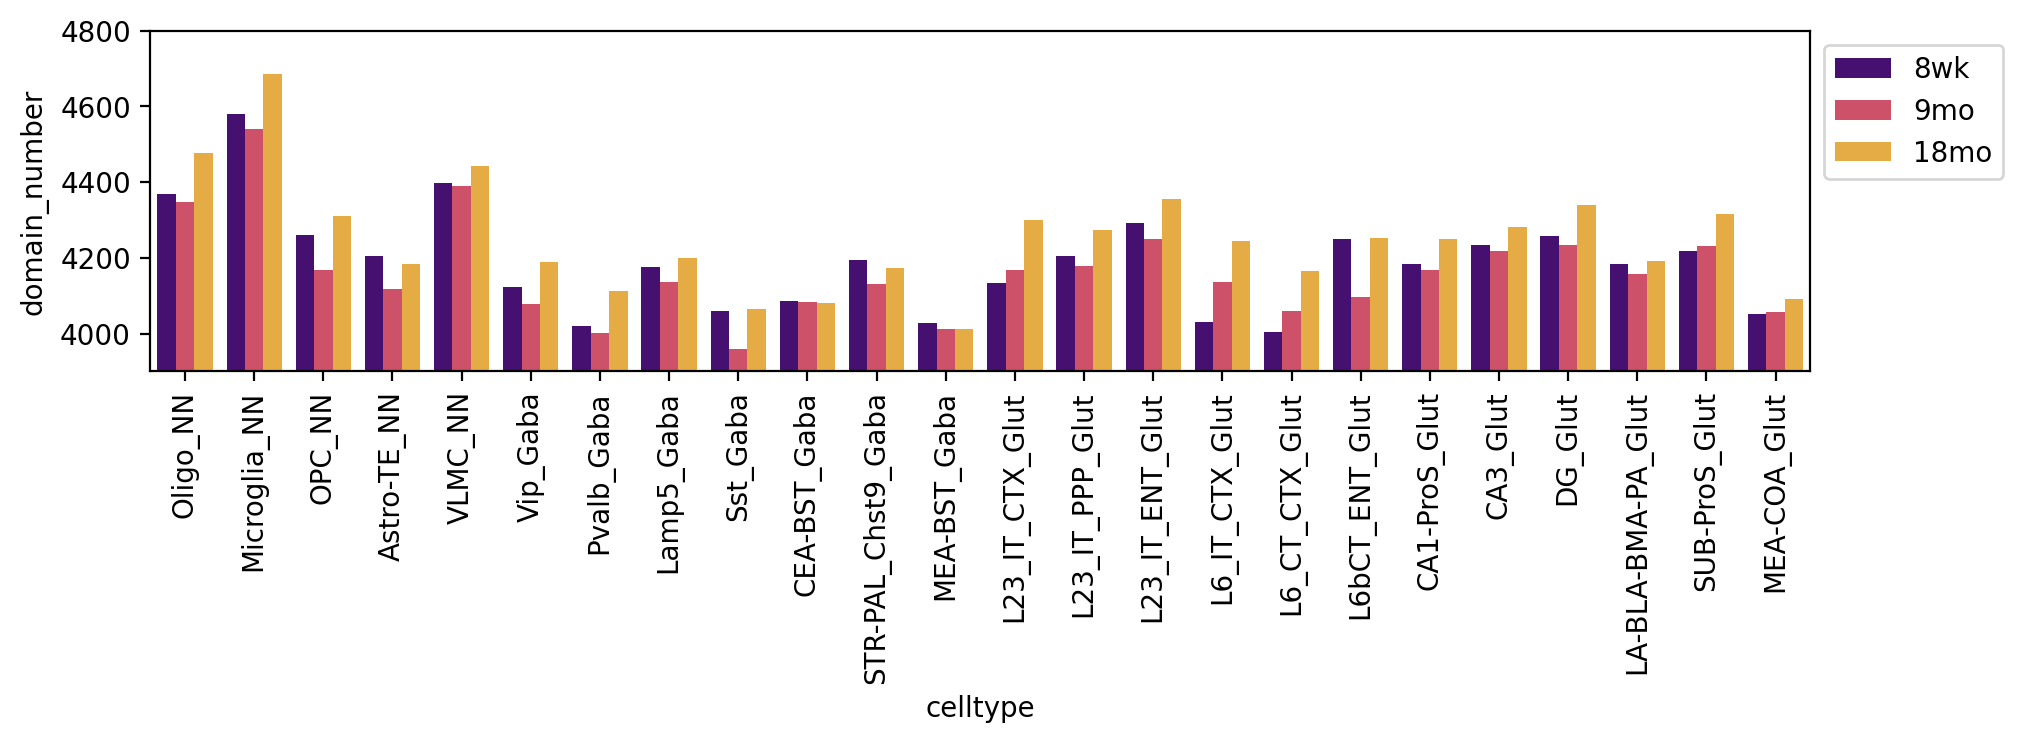

In [23]:
fig, ax = plt.subplots(nrows = 1,ncols = 1, figsize = (10,3.6), dpi = 200, sharex = True, constrained_layout = True)
sns.barplot(df_long, x="celltype", 
            y="domain_number", 
            order = order,
            hue_order = hue_order,
            palette=age_dict,
            linewidth=0.5,
            hue="age")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_ylim(3900, 4800)
plt.show()